In [44]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

%matplotlib inline

### 1. Dataset


In [45]:
dataset = pd.read_csv("occupancy.csv")
dataset

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
140,2015-02-02 14:19:00,23.700000,26.272000,585.200000,749.200000,0.004764,1
141,2015-02-02 14:19:59,23.718000,26.290000,578.400000,760.400000,0.004773,1
142,2015-02-02 14:21:00,23.730000,26.230000,572.666667,769.666667,0.004765,1
143,2015-02-02 14:22:00,23.722500,26.125000,493.750000,774.750000,0.004744,1
144,2015-02-02 14:23:00,23.754000,26.200000,488.600000,779.000000,0.004767,1
...,...,...,...,...,...,...,...
2800,2015-02-04 10:38:59,24.290000,25.700000,808.000000,1150.250000,0.004829,1
2801,2015-02-04 10:40:00,24.330000,25.736000,809.800000,1129.200000,0.004848,1
2802,2015-02-04 10:40:59,24.330000,25.700000,817.000000,1125.800000,0.004841,1
2803,2015-02-04 10:41:59,24.356667,25.700000,813.000000,1123.000000,0.004849,1


In [46]:
X = dataset[['CO2', 'Light']].values
y = dataset[['Occupancy']].values

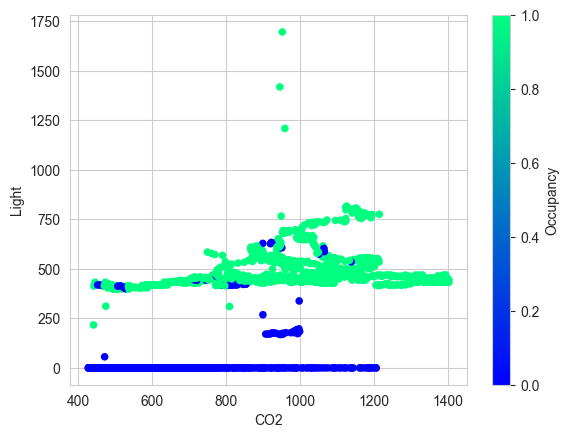

In [47]:
dataset.plot.scatter(x='CO2',y='Light', c='Occupancy', colormap='winter')
plt.show()

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [50]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform (X_test)

### 2. Modèle


In [51]:
# La fonction sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [52]:
def initialisation(X):
    W = np.random.randn(X.shape[1], 1)
    b = np.random.randn(1)
    return (W, b)

In [53]:
# Modèle
def modele(X, W, b):
    Z = X.dot(W) + b
    A = sigmoid(Z)
    return A

### 3. Fonction Coût 


In [54]:
def log_loss(y, A):
    return 1/len(y) * np.sum(-y * np.log(A) - (1 - y) * np.log(1 - A))

### 4. Optimisation - Gradient et Descente de Gradient


In [55]:
def gradients(X, A, y):
    dW = 1/len(y) * np.dot(X.T, A - y)
    db = 1/len(y) * np.sum(A - y)
    return (dW, db)

In [56]:
def optimisation(X, W, b, A, y, learning_rate):
    dW, db = gradients(X, A, y)
    W = W - learning_rate * dW
    b = b - learning_rate * db
    return (W, b)

### 5. Prédiction


In [57]:
def predict(X, W, b):
    A = modele(X, W, b)
    print(A)
    return A >= 0.5

### 6. modele final

In [58]:
def regression_logistique(X, y, learning_rate=0.1, n_iter=10000):
  # Initialisation
    W, b = initialisation(X)
    loss_history = []
  # Entrainement
    for i in range(n_iter):
        A = modele(X, W, b)
        loss_history.append(log_loss(y, A))
        W, b = optimisation(X, W, b, A, y, learning_rate=0.1)

  # Prediction
    plt.plot(loss_history)
    plt.xlabel('n_iteration')
    plt.ylabel('Log_loss')
    plt.title('Evolution des erreurs')
    return W,b

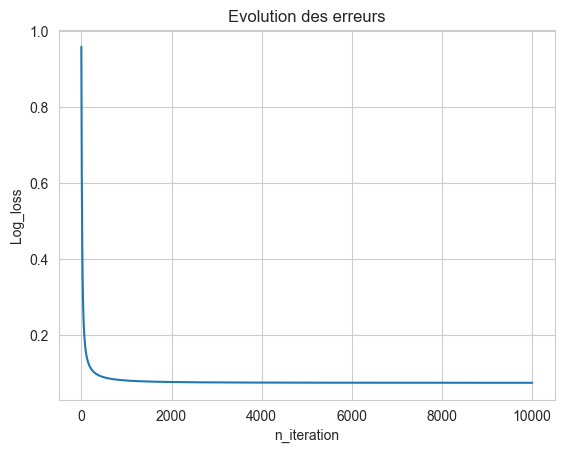

In [59]:
W,b=regression_logistique(X_train, y_train)

### 5. 1 Evaluation du modèle et Visualisation


In [60]:
from sklearn.metrics import accuracy_score
y_pred = predict(X_test, W, b)
print("Accuracy=",accuracy_score(y_test, y_pred))

[[0.99472042]
 [0.99929877]
 [0.00124183]
 [0.9955107 ]
 [0.00382642]
 [0.00255742]
 [0.00119412]
 [0.00115041]
 [0.00123681]
 [0.99039735]
 [0.95499638]
 [0.95806985]
 [0.98792464]
 [0.00118848]
 [0.9676711 ]
 [0.00126156]
 [0.00145842]
 [0.00822024]
 [0.0012627 ]
 [0.00164138]
 [0.00115993]
 [0.00120275]
 [0.00135582]
 [0.00130314]
 [0.98493377]
 [0.00117237]
 [0.80140947]
 [0.0018973 ]
 [0.866751  ]
 [0.97861304]
 [0.00124435]
 [0.9959714 ]
 [0.00126983]
 [0.97598397]
 [0.00115836]
 [0.00129408]
 [0.97892469]
 [0.95183922]
 [0.99403364]
 [0.97496772]
 [0.00137426]
 [0.00117253]
 [0.00118341]
 [0.00168745]
 [0.00146137]
 [0.00124351]
 [0.9797679 ]
 [0.00126298]
 [0.00120954]
 [0.00170348]
 [0.00128189]
 [0.85632499]
 [0.98016771]
 [0.00138544]
 [0.00172781]
 [0.97651182]
 [0.00121802]
 [0.99399098]
 [0.90115022]
 [0.98930022]
 [0.00127965]
 [0.00183647]
 [0.00127757]
 [0.88280972]
 [0.00127326]
 [0.97090893]
 [0.96618385]
 [0.8549045 ]
 [0.0030724 ]
 [0.00133311]
 [0.0014486 ]
 [0.89

[0.13704728]
[False]
[0.98438543]
[ True]
[0.88474329]
[ True]


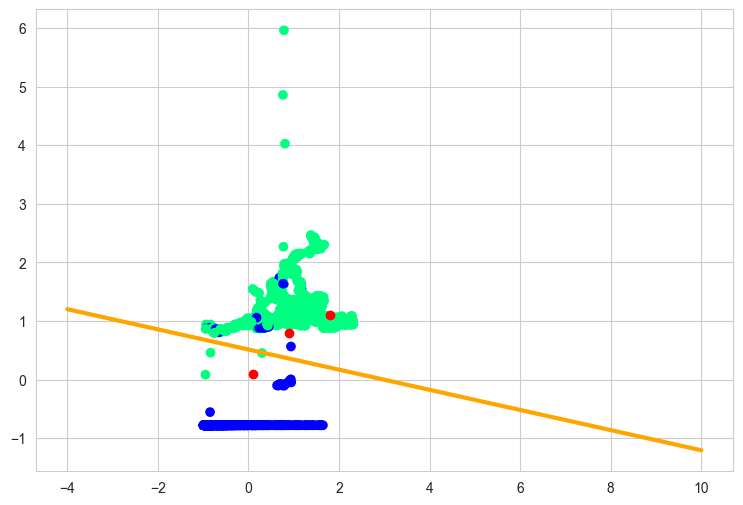

In [61]:
# Visualiser le dataset
fig, ax = plt.subplots(figsize=(9, 6))
ax.scatter(X_train[:,0], X_train[:, 1], c=y_train, cmap='winter')

# Dessiner la frontière de décision
x1 = np.linspace(-4, 10, 200)
x2 = ( - W[0] * x1 - b) / W[1]
ax.plot(x1, x2, c='orange', lw=3)

# Prédire la classe de nouveaux éléments

new_1=np.array([0.1,0.1])
new_2=np.array([1.8,1.1])
new_3=np.array([0.9,0.8])
ax.scatter(new_1[0], new_1[1], c='r')
ax.scatter(new_2[0], new_2[1], c='r')
ax.scatter(new_3[0], new_3[1], c='r')
print(predict(new_1, W, b))
print(predict(new_2, W, b))
print(predict(new_3, W, b))

plt.show()

In [62]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_test, W, b)
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[0.99472042]
 [0.99929877]
 [0.00124183]
 [0.9955107 ]
 [0.00382642]
 [0.00255742]
 [0.00119412]
 [0.00115041]
 [0.00123681]
 [0.99039735]
 [0.95499638]
 [0.95806985]
 [0.98792464]
 [0.00118848]
 [0.9676711 ]
 [0.00126156]
 [0.00145842]
 [0.00822024]
 [0.0012627 ]
 [0.00164138]
 [0.00115993]
 [0.00120275]
 [0.00135582]
 [0.00130314]
 [0.98493377]
 [0.00117237]
 [0.80140947]
 [0.0018973 ]
 [0.866751  ]
 [0.97861304]
 [0.00124435]
 [0.9959714 ]
 [0.00126983]
 [0.97598397]
 [0.00115836]
 [0.00129408]
 [0.97892469]
 [0.95183922]
 [0.99403364]
 [0.97496772]
 [0.00137426]
 [0.00117253]
 [0.00118341]
 [0.00168745]
 [0.00146137]
 [0.00124351]
 [0.9797679 ]
 [0.00126298]
 [0.00120954]
 [0.00170348]
 [0.00128189]
 [0.85632499]
 [0.98016771]
 [0.00138544]
 [0.00172781]
 [0.97651182]
 [0.00121802]
 [0.99399098]
 [0.90115022]
 [0.98930022]
 [0.00127965]
 [0.00183647]
 [0.00127757]
 [0.88280972]
 [0.00127326]
 [0.97090893]
 [0.96618385]
 [0.8549045 ]
 [0.0030724 ]
 [0.00133311]
 [0.0014486 ]
 [0.89

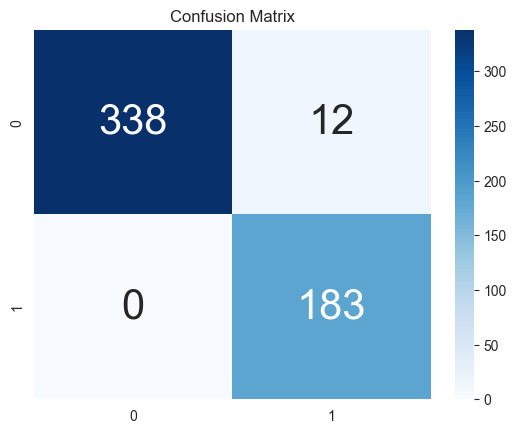

In [63]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()

In [64]:
#Affichage de la matrice de confusion

from sklearn.metrics import confusion_matrix
y_pred = predict(X_train, W, b)
cm = confusion_matrix(y_train, y_pred)
print(cm)

[[0.98099049]
 [0.00168745]
 [0.00684068]
 ...
 [0.90329219]
 [0.99280435]
 [0.00115134]]
[[1300   43]
 [   3  786]]


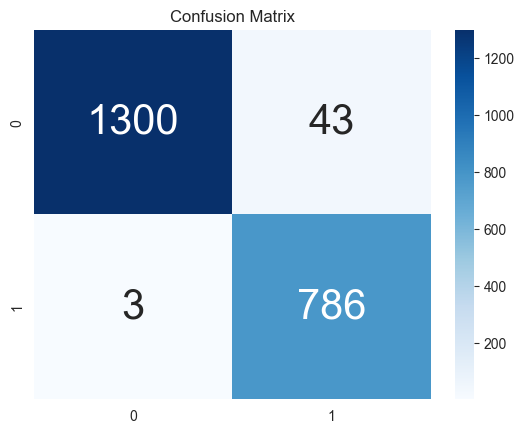

In [65]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()